In [10]:
import numpy as np
BATCH_SIZE = 32
n_batches = 250
Number_of_Samples = BATCH_SIZE*n_batches
LOGGING = False

In [11]:
MAX_DIGITS = 8
binary = np.unpackbits(np.array([range(2**MAX_DIGITS)],dtype=np.uint8).T,axis=1)
n = 10
def make_binary(n = Number_of_Samples, max_digits = MAX_DIGITS):
	x = np.random.randint(0, 2**max_digits/2, 2*n).reshape(n, 2)
	y = np.sum(x, axis = 1)
	x = np.transpose(binary[x], [0, 2, 1])
	y = binary[y]
	y = np.transpose(y[np.newaxis, :], (1, 2, 0))
	# x, y = np.array(list(reversed(x))), np.array(list(reversed(y)))
	x, y = np.fliplr(x), np.fliplr(y)	
	return(x, y)
a, b = make_binary()

In [12]:
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=40, batch_input_shape=(BATCH_SIZE, MAX_DIGITS, 2), return_sequences=True))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [13]:
from tqdm import trange
iters = trange(n_batches)

history = []
for i in iters:
	X, y = make_binary(BATCH_SIZE)
	hist = model.fit(X, y, epochs=10, verbose=0)
	history.extend(hist.history['loss'])
	if i%1 == 0:
		iters.set_description(str(np.mean(history[-2:])))


0.28257060051:  50%|████████████████████████████████▊                                | 126/250 [00:08<00:08, 14.19it/s]

0.0179659184068: 100%|███████████████████████████████████████████████████████████████| 250/250 [00:15<00:00, 17.56it/s]


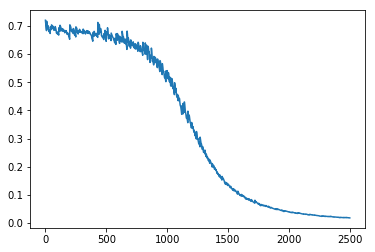

In [14]:
import matplotlib.pyplot as plt
plt.plot(history)
plt.show()

In [15]:
def make_decimal(X, y):
	bin2dec = lambda x: int("".join(str(i) for i in reversed(x)), 2)
	X = np.apply_along_axis(func1d=bin2dec, arr=X, axis=1)
	y = np.apply_along_axis(func1d=bin2dec, arr=y, axis=1)
	return(X, y)

In [17]:
x, y = make_binary(32)
preds = model.predict_classes(x, verbose=0)
x, preds = make_decimal(x, preds)
result = zip(x, preds)
for tup in result:
	print('Inputs: {}, Prediction: {}'.format(tup[0], tup[1][0]))

Inputs: [ 4 63], Prediction: 67
Inputs: [18 66], Prediction: 84
Inputs: [126 126], Prediction: 252
Inputs: [41 13], Prediction: 54
Inputs: [121  41], Prediction: 162
Inputs: [39  2], Prediction: 41
Inputs: [76 84], Prediction: 160
Inputs: [ 48 108], Prediction: 156
Inputs: [112   1], Prediction: 113
Inputs: [54 74], Prediction: 128
Inputs: [39 87], Prediction: 126
Inputs: [105  82], Prediction: 187
Inputs: [39 48], Prediction: 87
Inputs: [39 71], Prediction: 110
Inputs: [17 52], Prediction: 69
Inputs: [63 30], Prediction: 93
Inputs: [69 96], Prediction: 165
Inputs: [93 62], Prediction: 155
Inputs: [71 22], Prediction: 93
Inputs: [79 46], Prediction: 125
Inputs: [108  34], Prediction: 142
Inputs: [79 57], Prediction: 136
Inputs: [60 48], Prediction: 108
Inputs: [ 74 126], Prediction: 200
Inputs: [76 41], Prediction: 117
Inputs: [41 51], Prediction: 92
Inputs: [36 96], Prediction: 132
Inputs: [ 87 116], Prediction: 203
Inputs: [59 95], Prediction: 154
Inputs: [37 69], Prediction: 106
Inp